# Prédiction du Secteur le plus rentable au Maroc 

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was

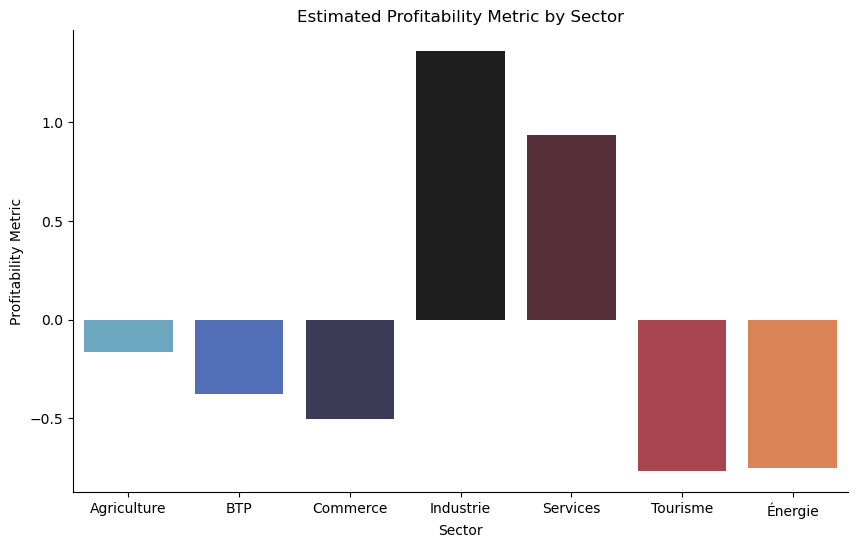

>>>>>>   The most estimated profitable sector in Morocco is : << Industrie >> with a profitability metric of 1.360236   <<<<<<


In [14]:
# Predict Most Profitable Sector in Morocco


def predict(
    Consommation_Finale,
    Excédent_brut_dexploitation,
    Exportations,
    Impôts_sur_les_produits,
    PIB,
    Production_nationale,
    Salaires_bruts,
):
    sector = [Consommation_Finale,
    Excédent_brut_dexploitation,
    Exportations,
    Impôts_sur_les_produits,
    PIB,
    Production_nationale,
    Salaires_bruts]
    
    return round(rf_model.predict([sector])[0], 6)
    

# Calculate the mean of each economic indicator for every sector
sector_means = df.groupby('Secteur').mean()
sector_means = sector_means.drop(columns=['Année', 'composite_profitability'])
# Create a dictionary with sector names as keys and their corresponding means as values
sector_arrays = sector_means.T.to_dict('list')
result = {}
for sector, means in sector_arrays.items():
    profitability = predict (
                    Consommation_Finale=means[0],
                    Excédent_brut_dexploitation=means[1],
                    Exportations=means[2],
                    Impôts_sur_les_produits=means[3],
                    PIB=means[4],
                    Production_nationale=means[5],
                    Salaires_bruts=means[6],
                    )    
    result[sector] = profitability
    
# Find the key-value pair with the maximum value
max_pair = max(result.items(), key=lambda item: item[1])
# Extract the key and value from the max_pair
max_key, max_value = max_pair

# Plot the results
# Create a DataFrame from the dictionary
result_df = pd.DataFrame(list(result.items()), columns=['Sector', 'Profitability Metric'])
# Create a seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sector', y='Profitability Metric', data=result_df, palette='icefire')
# Add titles and labels
plt.title('Estimated Profitability Metric by Sector')
plt.xlabel('Sector')
plt.ylabel('Profitability Metric')
# Improve the aesthetics
sns.despine()
# Show the plot
plt.show()

print(f">>>>>>   The most estimated profitable sector in Morocco is : << {max_key} >> with a profitability metric of {max_value}   <<<<<<")
    
        

**General Prediction of Profitability Metric**

In [15]:
# Predict Metric Profitability For Any Sector



def predict(
    Consommation_Finale,
    Excédent_brut_dexploitation,
    Exportations,
    Impôts_sur_les_produits,
    PIB,
    Production_nationale,
    Salaires_bruts,
):
    sector = [Consommation_Finale,
    Excédent_brut_dexploitation,
    Exportations,
    Impôts_sur_les_produits,
    PIB,
    Production_nationale,
    Salaires_bruts]
    # Predict the target value using the model
    predictions = [round(linear_model.predict([sector])[0], 6),
                   round(rf_model.predict([sector])[0], 6),
                   round(svr_model.predict([sector])[0], 6)]
    
    print('The profitability metric is between ',min(predictions),'and',max(predictions),'\n')
    
    print('LinearRegression_model:',predictions[0],'\tScore: ',round(r2_linear,3)*100,'%')
    print('RandomForest_model:',predictions[1],'\t\tScore: ',round(r2_rf,3)*100,'%')
    print('SupportVector_model:',predictions[2],'\t\tScore: ',round(r2_svr,3)*100,'%')
    
    print('\n>>> The estimated profitability metric', predictions[1])
    
    
    
predict ( # Random Values
    Consommation_Finale=6723.14,
    Excédent_brut_dexploitation=37750,
    Exportations=14568.1349,
    Impôts_sur_les_produits=11246.12,
    PIB=60421.132,
    Production_nationale=120001,
    Salaires_bruts=25350.3,
)    

The profitability metric is between  -0.455681 and -0.377342 

LinearRegression_model: -0.455681 	Score:  99.3 %
RandomForest_model: -0.377342 		Score:  99.8 %
SupportVector_model: -0.452939 		Score:  98.6 %

>>> The estimated profitability metric -0.377342


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
